 <p style="border:3px black  solid; text-align: left; padding: 10px">
✍ Теперь, когда вы знаете основные классы задач машинного обучения, настало время перейти к <b>предварительной обработке (препроцессингу, preprocessing)</b> данных. Препроцессинг в машинном обучении — это важный шаг, который помогает повысить качество данных с целью извлечения из них значимых идей.<br>
Как правило, реальные данные являются неполными, непоследовательными, неточными (содержат ошибки или выбросы). Препроцессинг данных помогает очищать, форматировать и упорядочивать необработанные данные, тем самым делая их готовыми к работе с моделями машинного обучения.

## 2. Способы представления данных

При этом выделяют:

- текстовые признаки (*object*);
- числовые признаки (*int64 и float64*);
- признаки, обозначающие дату и время/широту и долготу (представляются в числовом формате);
- категориальные признаки, которые могут иметь любой из трёх типов данных и обозначают принадлежность - объекта к какому-то классу/категории **(см. Python 11.5. «Тип данных Category»)**;
- бинарные признаки, которые являются подвидом категориальных признаков и обозначают принадлежность к одному из двух классов/категорий.

Для наглядности давайте рассмотрим пример данных для задачи предсказания цены автомобиля. В выборке представлено 7017 наблюдений и 12 характеристик для каждого из объектов.

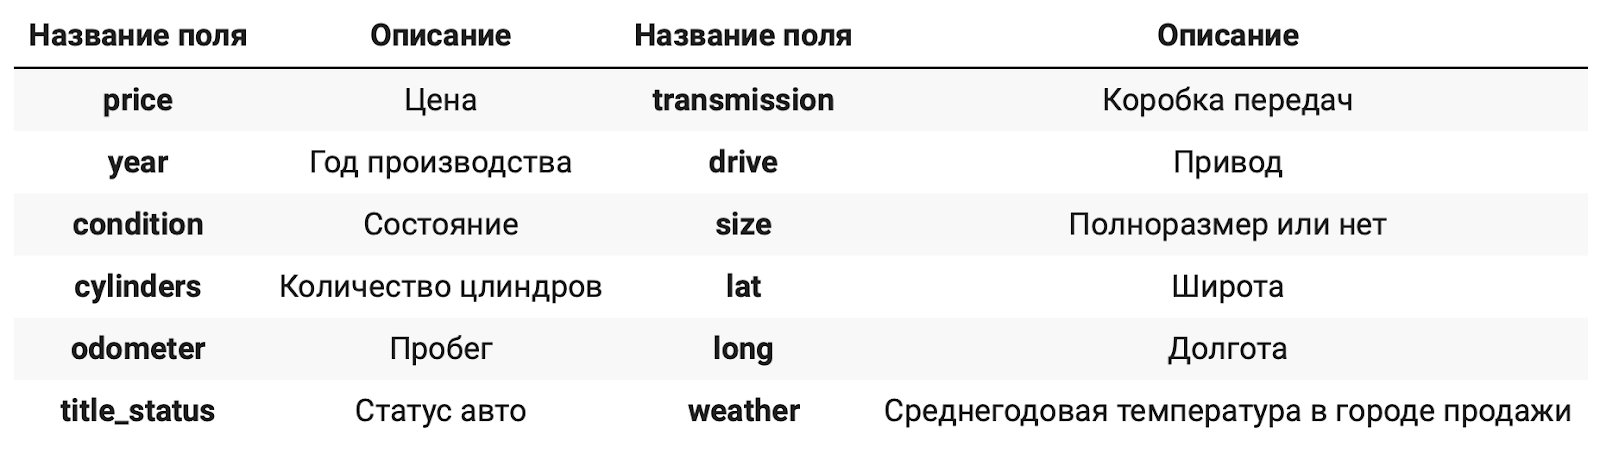

Для более подробного анализа числовых признаков используют методы **describe()** и **hist()**. Для оценки распределения текстовых признаков можно воспользоваться методом **value_counts()**.

Как вы поняли, разные представления данных требуют разного формата препроцессинга. Машины способны обрабатывать только цифровую информацию, в связи с чем все текстовые признаки должны быть переведены в числовой формат. Более того, к текстовым признакам могут быть применены **регулярные выражения** для агрегации важной информации и создания новых признаков **(см. EDA-3.2. «Создание признаков»)**.

Текстовые признаки, как и числовые, нуждаются в заполнении пропусков для последующей корректной работы алгоритмов машинного обучения. Однако способы такой обработки различны для двух данных типов. Числовые категориальные признаки также нуждаются в предобработке.

 ## 3. Кодирование признаков

**См. [ML-6. Кодирование_признаков(дополн)](http://localhost:8888/notebooks/ML/ML-6.3.%20%D0%9A%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2(%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD).ipynb)**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [8]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [9]:
data = pd.read_excel('data/data_ford_price.xlsx') 

Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [12]:
y = data['price']
X = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:

In [14]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе **EDA-3** вы познакомились с такими методами кодирования, как:

- порядковое кодирование;
- двоичное кодирование;
- однократное кодирование.

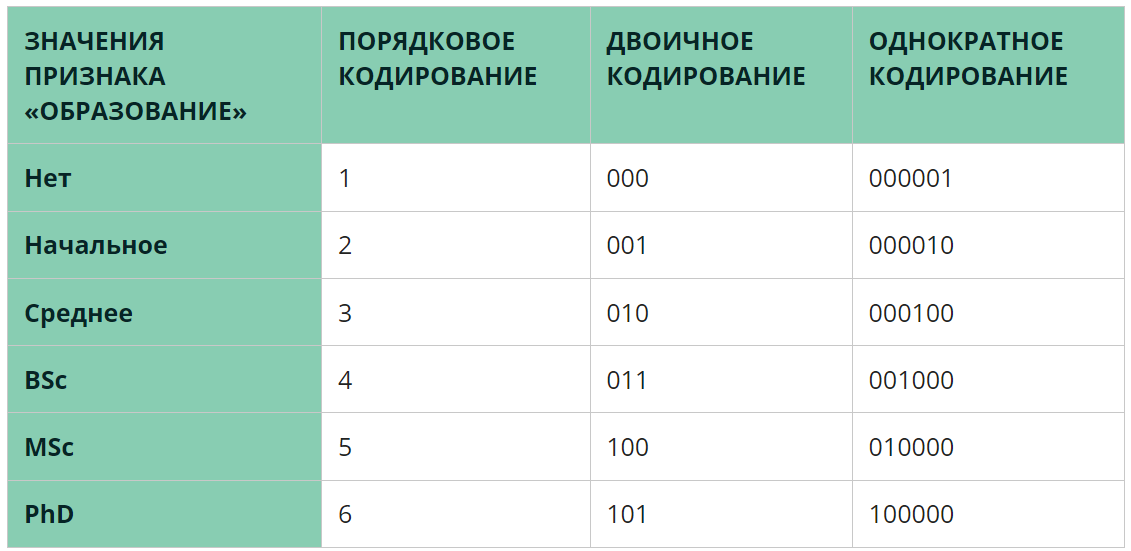

Для реализации данных методов мы использовали библиотеку [category_encoders](https://contrib.scikit-learn.org/category_encoders/). Однако вы уже знаете и такой мощный инструмент, как [scikit-learn](https://scikit-learn.org/stable/). Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в *sklearn.processing*.

<tbody>
<tr style="background-color: #88cdb2; vertical-align: middle; text-transform: uppercase; color: #062425; font-weight: bold;">
<td>Тип кодировки</td>
<td>Класс библиотеки sklearn</td>
</tr>
<tr>
<td style="background-color: #88cdb2; vertical-align: middle; color: #062425; font-weight: bold;">Порядковое кодирование</td>
<td><span class="code-blue">LabelEncoder</span></td>
</tr>
<tr>
<td style="background-color: #88cdb2; vertical-align: middle; color: #062425; font-weight: bold;">Двоичное кодирование</td>
<td><span class="code-blue">LabelBinarizer</span></td>
</tr>
<tr>
<td style="background-color: #88cdb2; vertical-align: middle; color: #062425; font-weight: bold;">Однократное кодирование</td>
<td><span class="code-blue">OneHotEncoder</span></td>
</tr>
</tbody>

Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод *fit()*. При кодировании признаков здесь также применяют *fit()* для подгонки кодировщика под выборку и *transform()* — для преобразования данных в числа.

**Алгоритм кодирования в sklearn следующий:**

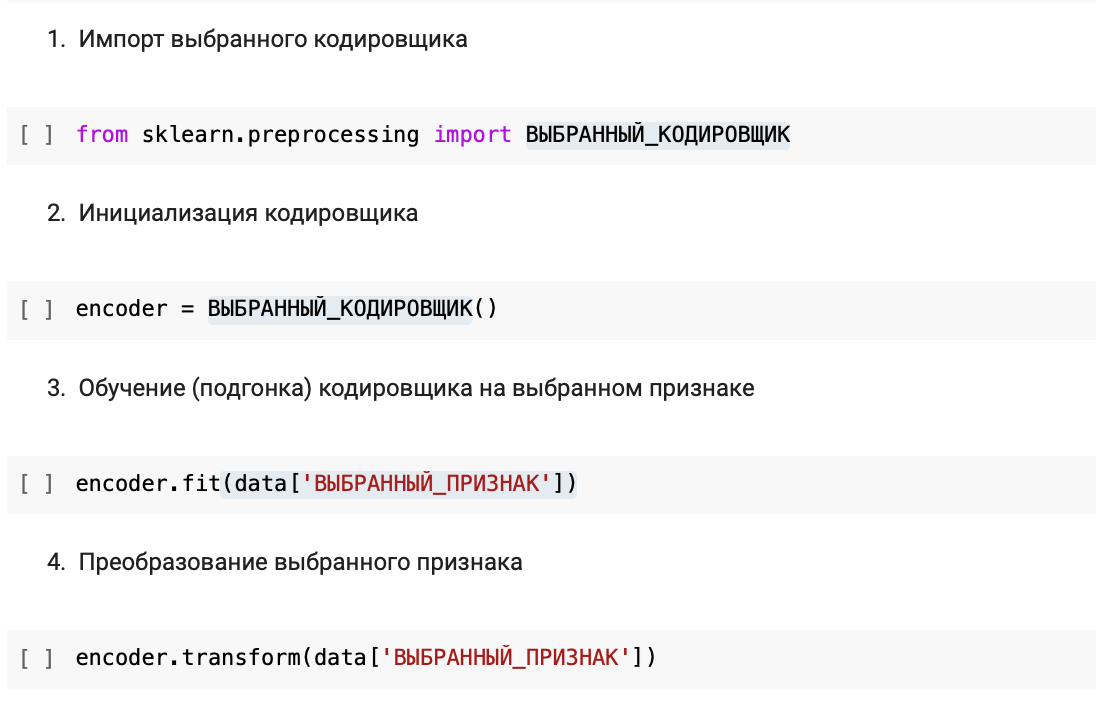

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии **подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой**.

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (one vs all):

In [6]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса *LabelBinarizer*, как и у двух остальных, есть атрибут **classes_**, который выводит список уникальных значений признака.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: *condition, cylinders, title_status, transmission, drive, size*.

При этом признаки *condition и cylinders* — числовые, а *title_status, transmission, drive, size* — текстовые.

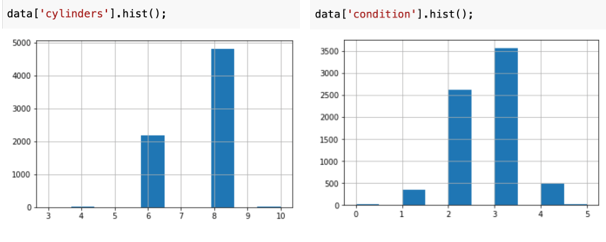

 <p style="border:3px aquamarine  solid; text-align: left; padding: 10px">
<b>Важно</b> производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, <b>категории номинальных являются независимыми</b>. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [15]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — **fit_transform()**. В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода **get_feature_names_out()** получим список новых названий колонок:

In [16]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод **get_dummies()** для получения однократного кодирования признаков. Однако *OneHotEncoder* способен принимать на вход как таблицы, так и numpy-массивы.

## 4. Обработка пропусков и выбросов

**См. ML-6. Обработка_пропусков_и_выбросов(дополн)**

## 5. Масштабирование признаков

 <p style="border:3px black  solid; text-align: left; padding: 10px">
✍ Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.
Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно <b>масштабирование признаков</b>.

**См. ML-6.5. Масштабирование_признаков(дополн)**

<center>$\color{green}{\text{QUANTILE TRANSFORMER}}$</center>

Этот [метод](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

<p style="background: aquamarine; text-align: left; padding: 10px">
<b>Квантильное преобразование</b> сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

<p style="background: aquamarine; text-align: left; padding: 10px">
<b>Квантильная функция</b>, также называемая функцией процентной точки (PPF), является обратной функцией кумулятивного распределения вероятностей (CDF).
    
<p style="background: aquamarine; text-align: left; padding: 10px">
<b>CDF</b> — это функция, которая возвращает вероятность значения, равного или меньше заданного значения

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

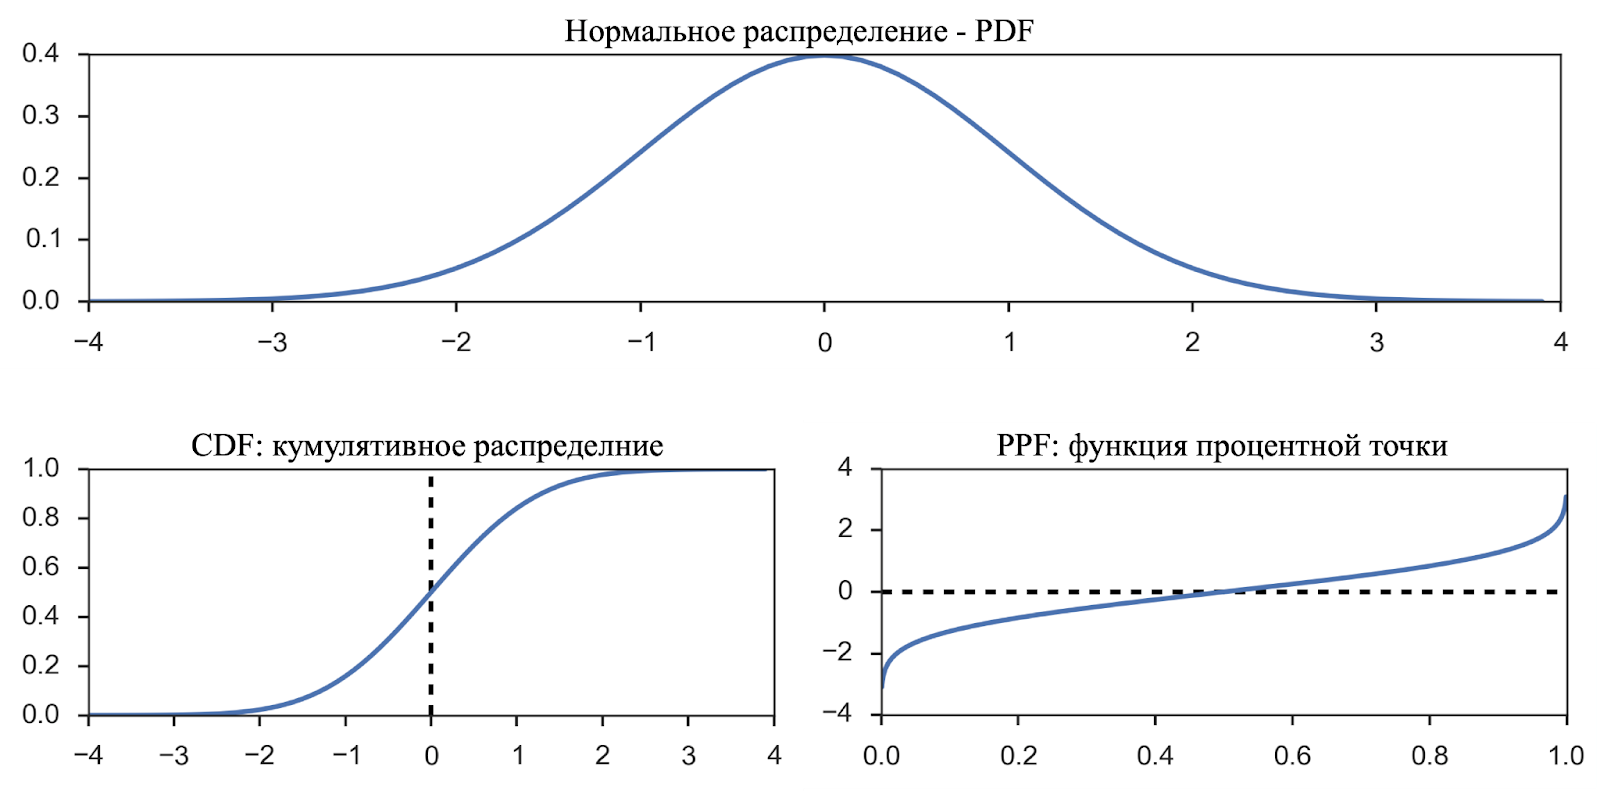

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html).

У класса есть аргумент **output_distribution**, который отвечает за тип выходного распределения. Он может принимать значение **'uniform'** (равномерное распределение) или **'normal'** (нормальное распределение). По умолчанию используется равномерное распределение, то есть значение параметра равно **'uniform'**.

Гиперпараметр **n_quantiles** определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

 <p style="background: #ffc7c7; border:1px black  solid; text-align: left; padding: 10px">
Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

**Cм. ML-6.6. Трансформации_распределений_признаков(дополн)**

<center>$\color{green}{\text{LOG TRANSFORM}}$</center>

**Логарифмическое преобразование** — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому что функция логарифма создана для работы с большими числами.

**Cм. ML-6.6. Трансформации_распределений_признаков(дополн)**

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения NaN в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

<center>$\color{green}{\text{POWER TRANSFORMER SCALER}}$</center>

Как и другие скейлеры, с которыми вы уже познакомились, *Power Transformer* также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. *Power Transformer* фактически автоматизирует принятие этого решения, вводя параметр, называемый **lambda**. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение **lambda** и используя один из следующих параметрических методов:

- **Преобразование Бокса-Кокса**, которое работает для положительных значений признака.
- **Преобразование Йео-Джонсона**, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

**Cм. ML-6.6. Трансформации_распределений_признаков(дополн)**

## 7. Даты и расстояния

В рамках блока [*EDA-3.4. «Создание признаков. Работа с форматом «дата-время»*](https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@4fe35f98b58b4459a29dd30badebf2d6/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@299db8f2b6034c46bf9ca45a6511ecef) вы узнали о том, как с помощью двух колонок с датой и временем определять, например, продолжительность телефонного разговора.

In [ ]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

По аналогии с датой и временем можно использовать информацию в столбцах, например, широту и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту и долготу. Для этого нам понадобится библиотека **geopy**.

In [2]:
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'geopy'

**См. ML-6.7. Даты и расстояния (дополн)**

С помощью библиотек **geopandas** и **shapely** можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

Установим данные библиотеки:

In [ ]:
!pip install geopandas
!pip install shapely

**См. ML-6.7. Даты и расстояния (дополн)**

##  8. Отбор признаков: мотивация

<p style="background: aquamarine; text-align: left; padding: 10px">
<b>Отбор признаков</b>— это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

**См. ML-6.8. Отбор_признаков**

## 9. Отбор признаков: классификация методов

<p style="background: aquamarine; text-align: left; padding: 10px">
Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

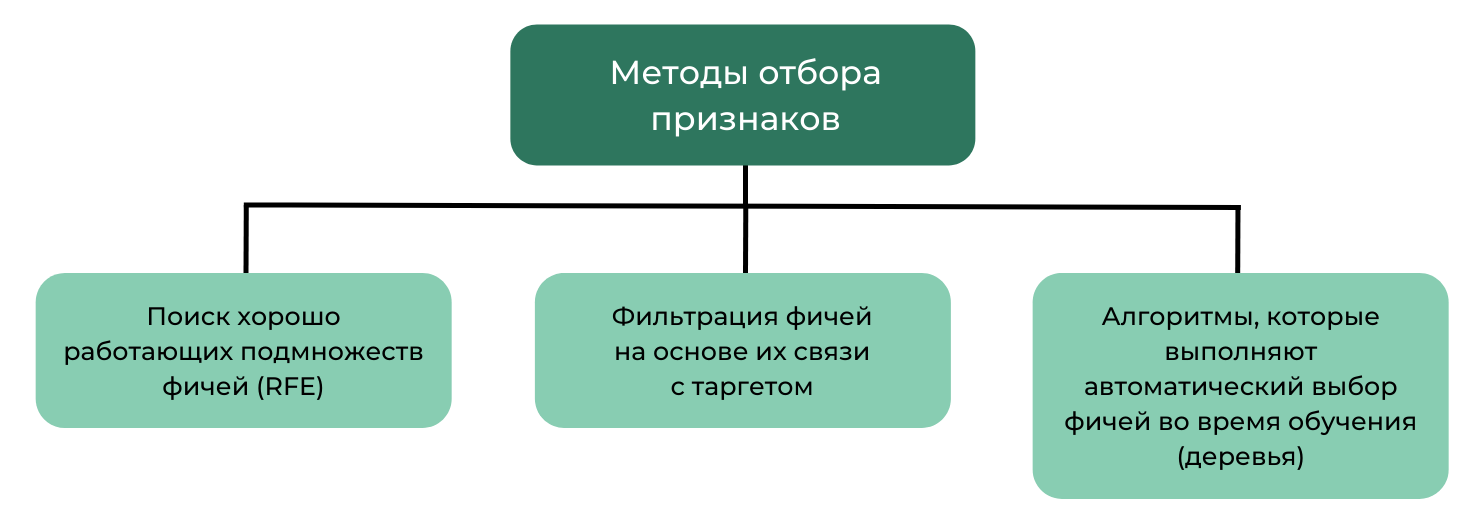

<center>$\color{green}{\text{RFE}}$</center>

<p style="background: aquamarine; text-align: left; padding: 10px">
<b>Метод рекурсивного исключения признаков (RFE)</b> предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

**Метод .ranking_** используется для ранжирования фичей по степени их важности.

Выделим три наиболее значимых признака:

In [ ]:
from sklearn.feature_selection import RFE

**См. ML-6.8. Отбор_признаков**

<center>$\color{green}{\text{МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ}}$</center>

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема — помощник в выборе метода селекции признаков.

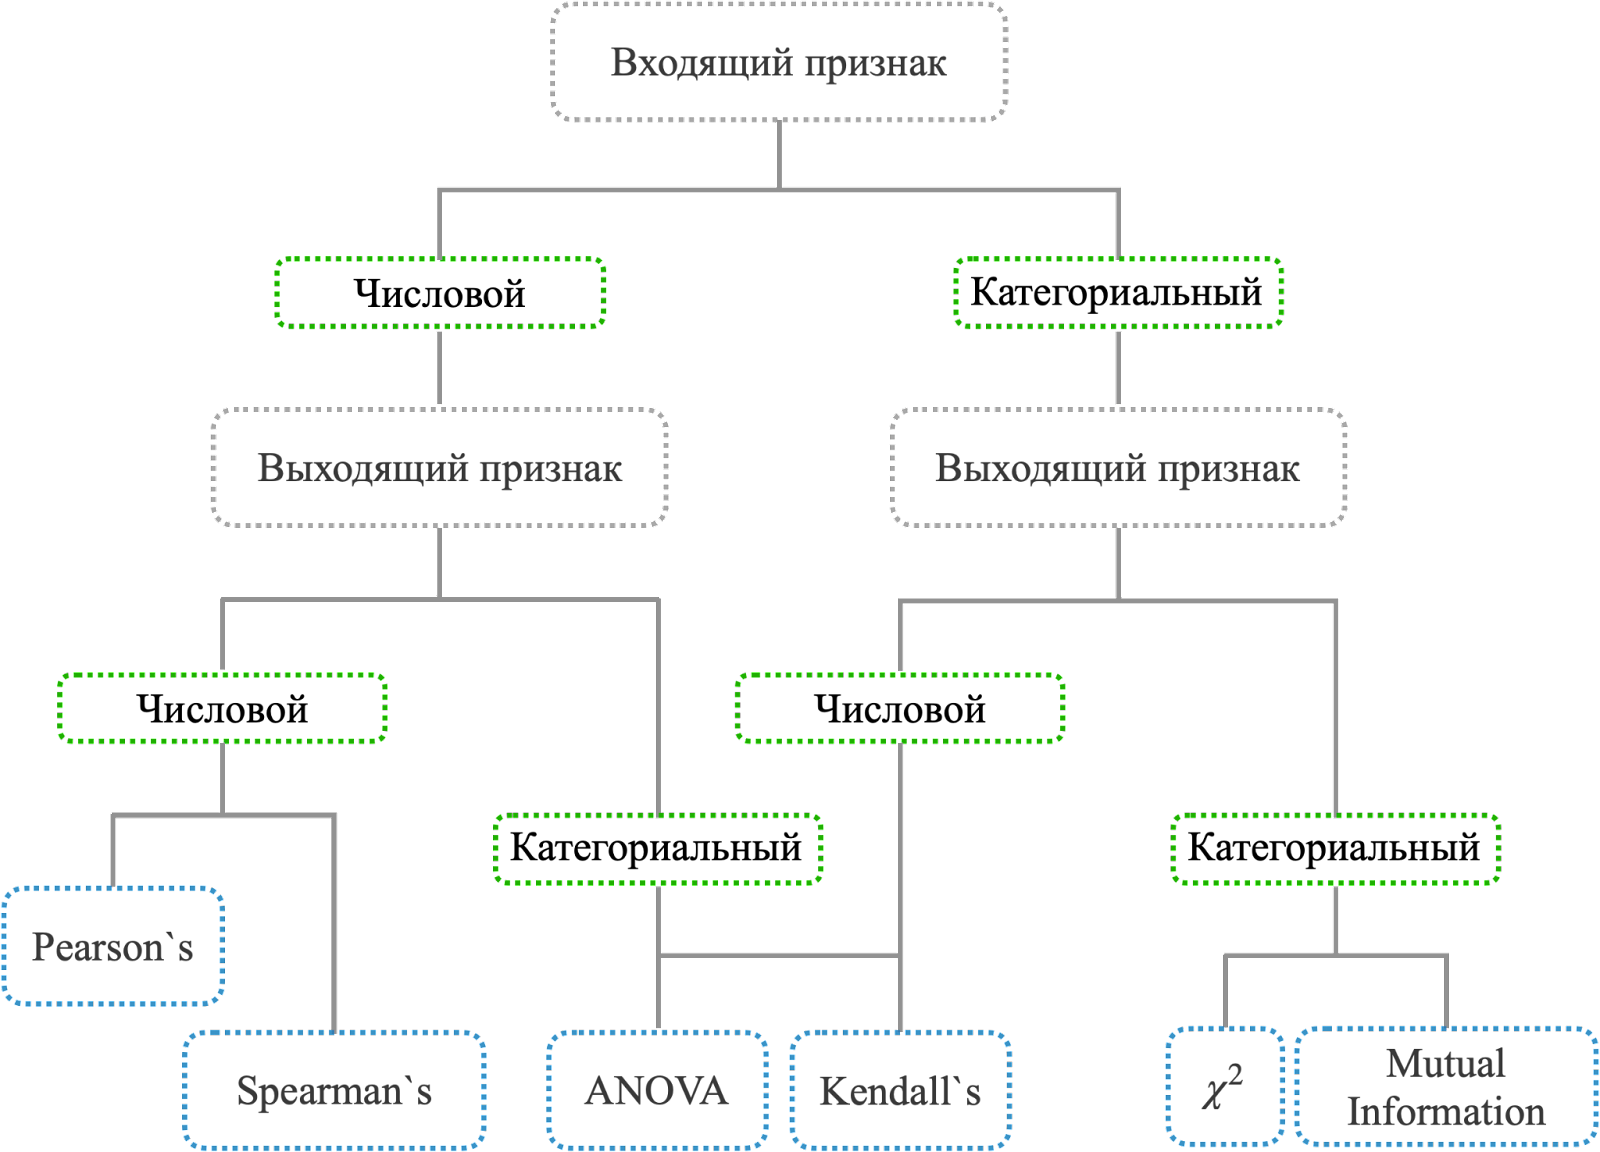

Библиотека sklearn обеспечивает реализацию большинства полезных статистических показателей, например:

- коэффициента корреляции Пирсона: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html);
- дисперсионного анализа ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html);
- хи-квадрата: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html);
- взаимной информации: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) и [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).

Кроме того, библиотека *SciPy* обеспечивает реализацию многих других статистических данных, таких как тау Кендалла [(kendalltau)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) и ранговая корреляция Спирмена [(spearmanr)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html).

*sklearn* также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

- выбор k лучших переменных: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html);
- выбор переменных верхнего процентиля: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

**См. ML-6.8. Отбор_признаков**

Дополнительно есть отбор признаков с помощью [ANOVA F-measure]()